C:\Users\USER\AppData\Local\Temp\ipykernel_23156\1055413037.py:17: RuntimeWarning: Mean of empty slice
  avg_values[parameter] = np.nanmean(parameter_data)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


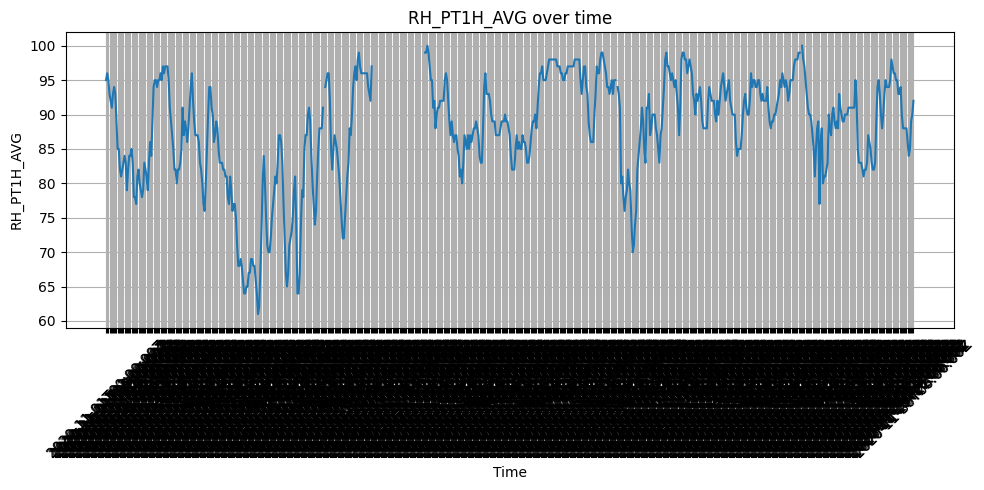

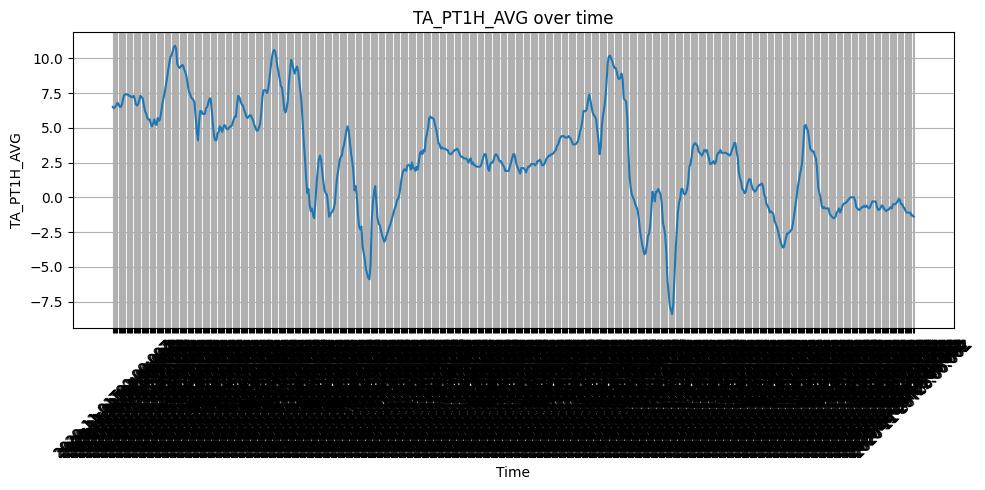

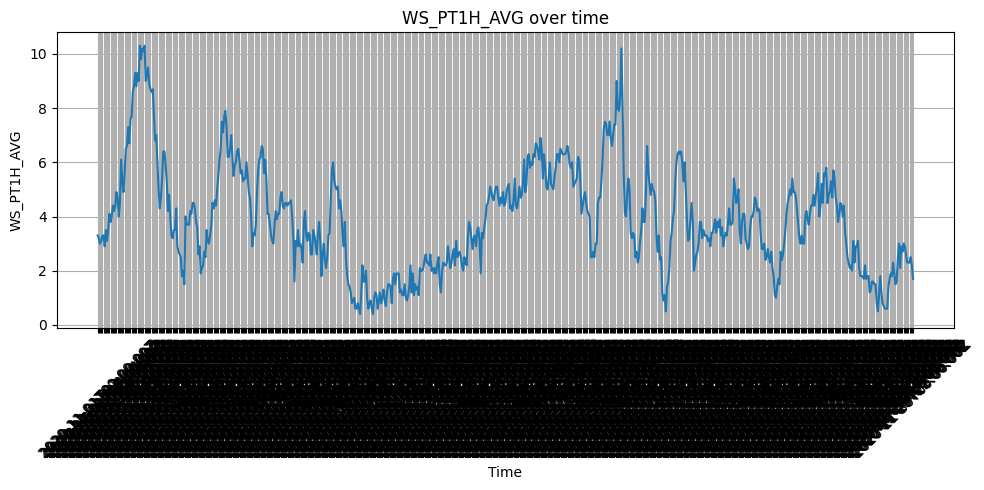

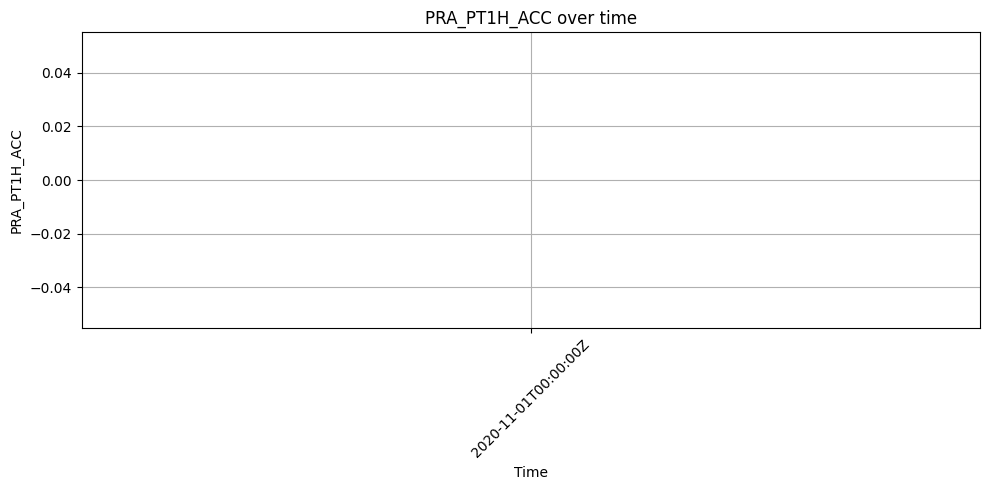

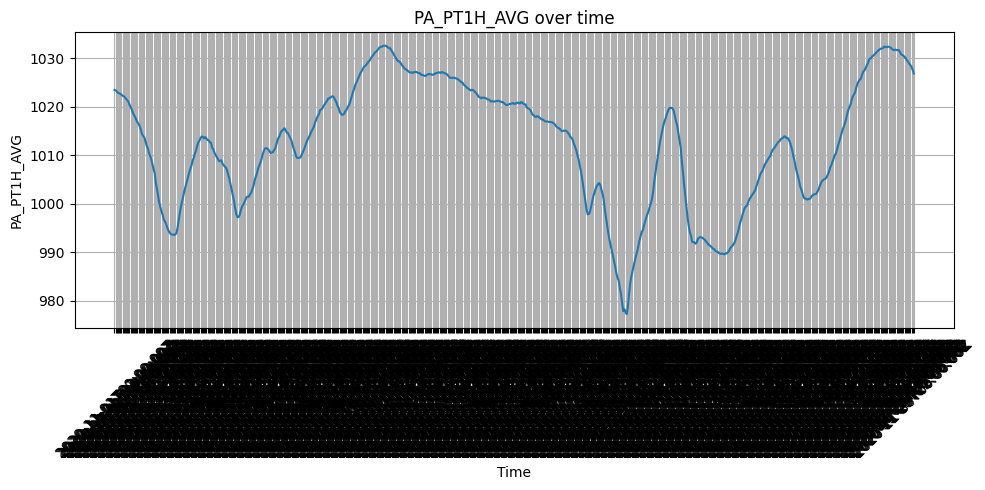

Average value for RH_PT1H_AVG: 87.90138674884437

Average value for TA_PT1H_AVG: 2.7400286944045913

Average value for WS_PT1H_AVG: 3.9007173601147778

Average value for PRA_PT1H_ACC: nan

Average value for PA_PT1H_AVG: 1012.6341463414634


Summary Statistics:

Parameter: RH_PT1H_AVG
Minimum: 61.0
Maximum: 100.0
Median: 89.0

Parameter: TA_PT1H_AVG
Minimum: -8.4
Maximum: 10.9
Median: 2.8

Parameter: WS_PT1H_AVG
Minimum: 0.4
Maximum: 10.3
Median: 3.7

Parameter: PRA_PT1H_ACC
Minimum: nan
Maximum: nan
Median: nan

Parameter: PA_PT1H_AVG
Minimum: 977.3
Maximum: 1032.6
Median: 1013.7

Hour with highest value for each parameter:
RH_PT1H_AVG: 2020-11-12T13:00:00Z
TA_PT1H_AVG: 2020-11-03T06:00:00Z
WS_PT1H_AVG: 2020-11-02T12:00:00Z
PRA_PT1H_ACC: nan
PA_PT1H_AVG: 2020-11-10T18:00:00Z


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('weather_2020-11.csv')

# Convert 'ParameterValue' column to numeric, coercing errors to NaN
data['ParameterValue'] = pd.to_numeric(data['ParameterValue'], errors='coerce')

# Calculate average values for each parameter
parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
avg_values = {}
for parameter in parameters:
    parameter_data = data[data['ParameterName'] == parameter]['ParameterValue']
    if not parameter_data.empty:  # Check if parameter data is not empty
        avg_values[parameter] = np.nanmean(parameter_data)
    else:
        avg_values[parameter] = np.nan

# Calculate min, max, and median for each parameter
summary_statistics = {}
for parameter in parameters:
    parameter_values = data[data['ParameterName'] == parameter]['ParameterValue'].dropna()
    summary_statistics[parameter] = {
        'Minimum': np.min(parameter_values),
        'Maximum': np.max(parameter_values),
        'Median': np.median(parameter_values)
    }

# Find hour with the highest value for each parameter
hour_with_highest_value = {}
for parameter in parameters:
    parameter_data = data[data['ParameterName'] == parameter]
    if not parameter_data.empty:
        idx = parameter_data['ParameterValue'].idxmax()
        if idx in data.index:
            hour_with_highest_value[parameter] = data.loc[idx, 'Time']
        else:
            hour_with_highest_value[parameter] = np.nan  # Assign NaN if idx not found
    else:
        hour_with_highest_value[parameter] = np.nan  # Assign NaN if no valid values

# Visualize trends over time for each parameter
for parameter in parameters:
    plt.figure(figsize=(10, 5))
    parameter_data = data[data['ParameterName'] == parameter]
    if not parameter_data.empty:
        plt.plot(parameter_data['Time'], parameter_data['ParameterValue'])
        plt.title(parameter + ' over time')
        plt.xlabel('Time')
        plt.ylabel(parameter)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(parameter + '.png')
        plt.show()
    else:
        print(f"No data available for {parameter}")

# Print calculated average values
for parameter, value in avg_values.items():
    print(f"Average value for {parameter}: {value}\n")

# Print summary statistics
print("\nSummary Statistics:")
for parameter, stats in summary_statistics.items():
    print(f"\nParameter: {parameter}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")

# Print hour with the highest value for each parameter
print("\nHour with highest value for each parameter:")
for parameter, hour in hour_with_highest_value.items():
    print(f"{parameter}: {hour}")
